<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/%5BAutoEncoder%5D%5Bimage_search%5DBMW10_img_search_by_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영상 데이터 검색 by CNN

# 데이터 준비


<br>

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

In [ ]:
!rm -rf bmw10_release.tgz
!wget http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz
!ls -al  

--2022-01-27 06:14:40--  http://ai.stanford.edu/~jkrause/car196/bmw10_release.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59628953 (57M) [application/x-gzip]
Saving to: ‘bmw10_release.tgz’

bmw10_release.tgz   100%[===================>]  56.87M  14.6MB/s    in 6.2s    

2022-01-27 06:14:46 (9.15 MB/s) - ‘bmw10_release.tgz’ saved [59628953/59628953]

total 58248
drwxr-xr-x 1 root root     4096 Jan 27 06:14 .
drwxr-xr-x 1 root root     4096 Jan 27 06:12 ..
-rw-r--r-- 1 root root 59628953 Apr 30  2021 bmw10_release.tgz
drwxr-xr-x 4 root root     4096 Jan  7 14:33 .config
drwxr-xr-x 1 root root     4096 Jan  7 14:33 sample_data


In [ ]:
!tar xvfz bmw10_release.tgz
!ls -al bmw10_release.tgz

bmw10_ims/
bmw10_ims/10/
bmw10_ims/10/150303361.jpg
bmw10_ims/10/150303689.jpg
bmw10_ims/10/150304122.jpg
bmw10_ims/10/150304536.jpg
bmw10_ims/10/150302397.jpg
bmw10_ims/10/150304216.jpg
bmw10_ims/10/150304396.jpg
bmw10_ims/10/150302795.jpg
bmw10_ims/10/150303565.jpg
bmw10_ims/10/150303015.jpg
bmw10_ims/10/150303922.jpg
bmw10_ims/10/150304871.jpg
bmw10_ims/10/150302515.jpg
bmw10_ims/10/150304453.jpg
bmw10_ims/10/150304421.jpg
bmw10_ims/10/150304828.jpg
bmw10_ims/10/150304381.jpg
bmw10_ims/10/150303002.jpg
bmw10_ims/10/150304813.jpg
bmw10_ims/10/150304132.jpg
bmw10_ims/10/150302770.jpg
bmw10_ims/10/150302307.thumb.jpg
bmw10_ims/10/150302884.jpg
bmw10_ims/10/150304480.thumb.jpg
bmw10_ims/10/150304550.jpg
bmw10_ims/10/150302686.jpg
bmw10_ims/10/150304261.jpg
bmw10_ims/10/150303349.jpg
bmw10_ims/10/150304672.jpg
bmw10_ims/10/150303829.jpg
bmw10_ims/10/150304740.jpg
bmw10_ims/10/150304294.jpg
bmw10_ims/10/150304410.jpg
bmw10_ims/10/150303122.jpg
bmw10_ims/10/150303008.jpg
bmw10_ims/10/15030

# 데이터 분할 및 디렉토리 설정

In [ ]:
!pip install split-folders

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('bmw10_ims', output="data", seed=1337, ratio=(0.7,0.0,0.3))

Copying files: 512 files [00:00, 1721.75 files/s]


# 모델 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_2 (Flatten)         (None, 68992)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               17662208  
                                                                 
 encoded (BatchNormalization  (None, 256)              1024      
 )                                                               
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 25,434,371
Trainable params: 17,665,290
Non-trainable params: 7,769,081
__________________________________

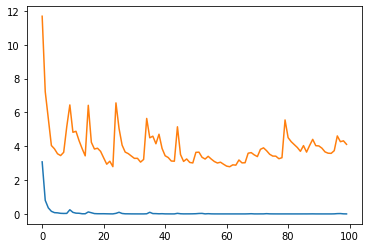

3/3 [==============================] - 1s 320ms/step - loss: 4.1109 - acc: 0.2949
loss= 4.110899925231934
acc= 0.29487180709838867


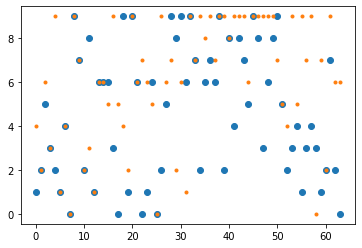

label category index = 1.0
predicted category index = 4
predicted category name = 3


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2


early_stopping = EarlyStopping()

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(name="encoded"))
model.add(Dense(10, activation='softmax')) # 1 ~ 8 & 10 & 11 : 10개의 클래스

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "data/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "data/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=100
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 인코딩

In [ ]:
encoder = Model(inputs=model.input, outputs=model.layers[-2].output)

images = []
codes = []
for i in range(len(train_data_generator)):
    batch_x, batch_y = next(train_data_generator)
    encoded = encoder(batch_x)
    images.extend(batch_x)
    codes.extend(encoded)

images = np.array(images)
codes = np.array(codes)

print(images.shape)
print(codes.shape)

(356, 224, 224, 3)
(356, 256)


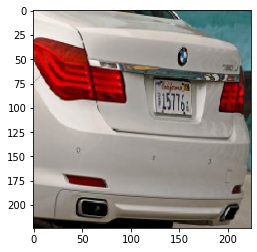

In [ ]:
batch_x, batch_y = next(test_data_generator)

target_image = batch_x[0]
target_code = encoder.predict(batch_x)[0]

plt.imshow(target_image.astype(int))
plt.show()

# 가까운 영상 찾기

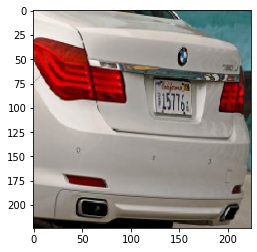

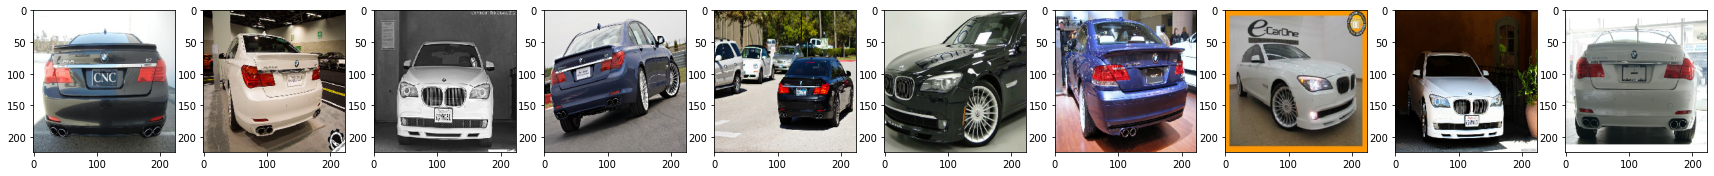

In [ ]:
from scipy.spatial import distance

distances = [distance.euclidean(target_code, code) for code in codes]
similar_index = np.argsort(distances)

plt.imshow(target_image.astype(int))
plt.show()
n = 10
plt.figure(figsize=(30,3))
for i in range(1,n+1):
    plt.subplot(1,n,i)
    plt.imshow(images[similar_index[i]].astype(int))
plt.show()


# DCI KNN 

빠른 최근접 검색 알고리즘. https://github.com/ke-li/dci-knn



In [ ]:
import numpy as np
import copy
import bisect
from collections import defaultdict

class Dci:
  @staticmethod
  def get_proj_norm_vec(dim):
    a = np.random.random(dim) * 2 - 1
    return a / np.linalg.norm(a)

  @staticmethod
  def get_proj_norm_vecs(dim, m):
    return np.array([Dci.get_proj_norm_vec(dim) for _ in range(m)])

  @staticmethod
  def get_proj_point(vector, point):
    """
    point가 vector에 proj된 포인트가 y라면,
    a*vector = constant * y에서 비교 가능한 a를 구한다.
    """
    return sum(vector * point)

  def _get_projected_points(self):
    """
    각 쿼리선에 대해서,
    (카테고리, vector 크기)를 크기에 대해 정렬하여 구한다.
    """
    data_full = []
    data_only = []
    # For Query lines,
    for vec in self.query_lines:
      temp = []
      # Project all points to line
      for category, point in self.points:
        temp.append((category, Dci.get_proj_point(vec, point)))
      data = sorted(temp, key=lambda x: x[1])
      data_full.append(data)
      data_only.append([d[1] for d in data])
    return data_full, data_only


  def __init__(self, point_map, query_line_count=3):
    self.dim = list(point_map.values())[0].shape[0]
    self.total_scattered_point_count = len(point_map.keys())
    self.point_map = point_map
    self.points = list(point_map.items())
    self.query_line_count = query_line_count
    self.query_lines = Dci.get_proj_norm_vecs(self.dim, query_line_count)
    self.data_full, self.data_key = self._get_projected_points()

  def query(self, point, highest_k=5):
    """
    가장 가까울 highest_k만큼의 point를 구한다.
    """
    if highest_k > self.total_scattered_point_count:
      highest_k = self.total_scattered_point_count
    this_projected = [Dci.get_proj_point(vec, point) for vec in self.query_lines]
    
    appear_dict = defaultdict(int)
    double_pointer_dict = dict()

    result = []
    flag = False

    for i in range(self.query_line_count):
      find = bisect.bisect(self.data_key[i], this_projected[i])
      if find == self.total_scattered_point_count: find -= 1

      category = self.data_full[i][find][0]
      appear_dict[category] += 1

      double_pointer_dict[i] = (find, find)
      if appear_dict[category] == self.query_line_count:
        result.append(category)
        if len(result) == highest_k:
          flag = True
          break

    for _ in range(self.total_scattered_point_count):  
      if flag: break
      for i in range(self.query_line_count):
        key = self.data_key[i]
        full = self.data_full[i]

        left, right = double_pointer_dict[i]
        # left - 1 right + 1 중 하나를 선택

        if left > 0:
          val1 = abs(this_projected[i] - key[left-1])
        else:
          val1 = float('inf')
        if right < self.total_scattered_point_count - 1:
          val2 = abs(this_projected[i] - key[right+1])
        else:
          val2 = float('inf')

        if val1 <= val2:
          idx = left - 1
          double_pointer_dict[i] = (idx, right)
        else:
          idx = right + 1
          double_pointer_dict[i] = (left, idx)

        category = full[idx][0]
        appear_dict[category] += 1

        if appear_dict[category] == self.query_line_count:
          result.append(category)
          if len(result) == highest_k:
            flag = True
            break

    return sorted(list(
      map(
        lambda c: (c, np.linalg.norm(self.point_map[c] - point, ord=2)),
        result
      )
    ), key=lambda x: x[1])

class AnchorDci(Dci):
  def __init__(self, anchors, query_line_count=10):
    points = dict()
    for k, v in anchors.items():
      points[k] = v['mean']
    super().__init__(points, query_line_count)

In [ ]:
point_dic = {i:v for i, v in enumerate(codes)}
dci = Dci(point_dic, 5)
query_result = dci.query(target_code, 11)

In [ ]:
query_result

[(104, 15.658459),
 (201, 16.009438),
 (70, 18.04099),
 (5, 19.162773),
 (65, 20.743198),
 (89, 22.49116),
 (289, 22.870157),
 (199, 23.200996),
 (311, 25.491468),
 (239, 26.619064),
 (77, 28.491346)]

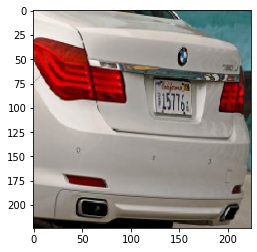

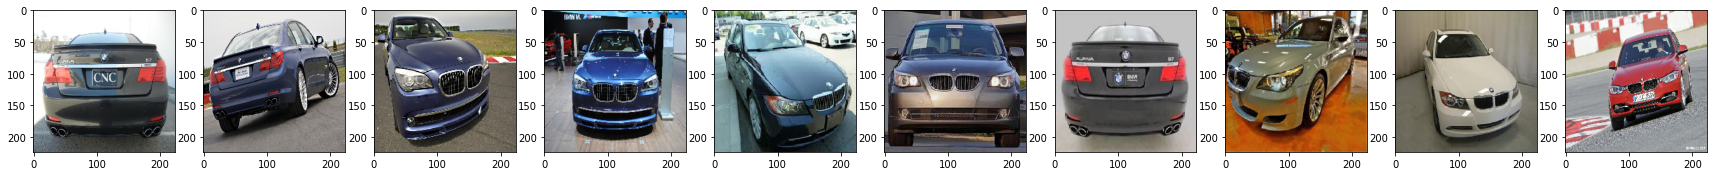

In [ ]:
similar_index = [i for i, d in query_result]

plt.imshow(target_image.astype(int))
plt.show()
n = 10
plt.figure(figsize=(30,3))
for i in range(1,n+1):
    plt.subplot(1,n,i)
    plt.imshow(images[similar_index[i]].astype(int))
plt.show()
